In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt

In [26]:
races = pd.read_csv(r"../data/races.csv")
runs = pd.read_csv(r"../data/runs.csv")

In [27]:
races_data = races[['race_id', 'venue', 'config', 'surface', 'distance', 'going', 'race_class', 'date']]
runs_data = runs[['race_id', 'won', 'horse_age', 'horse_country', 'horse_type', 'horse_rating',
                  'horse_gear', 'declared_weight', 'actual_weight', 'draw', 'win_odds',
                  'place_odds', 'horse_id']]

In [28]:
df = pd.merge(runs_data, races_data)
df.head()

,race_id,won,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,horse_id,venue,config,surface,distance,going,race_class,date
0,0,0.0,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,3917,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
1,0,0.0,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,2157,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
2,0,0.0,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,858,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
3,0,0.0,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,1853,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
4,0,0.0,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,2796,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02


In [29]:
df.shape

(79447, 20)

In [30]:
df = df.dropna()
df.shape

(75710, 20)

# basic info of the data

In [31]:
df.date = pd.to_datetime(df.date)
df.date.dtype

dtype('<M8[ns]')

In [32]:
min(df.date), max(df.date)

(Timestamp('1997-06-02 00:00:00'), Timestamp('2005-06-05 00:00:00'))

In [33]:
start_time = min(df.date).strftime('%d %B %Y')
end_time = max(df.date).strftime('%d %B %Y')
no_of_horses = df.horse_id.nunique()
no_of_races = df.race_id.nunique()

print(f'The dataset was collected from {start_time} to {end_time}, which contains information about {no_of_horses} horses and {no_of_races} races. ')

The dataset was collected from 02 June 1997 to 05 June 2005, which contains information about 4280 horses and 6047 races. 


In [34]:
# drop the unnecessary columns
df = df.drop(columns=['horse_id', 'date'])
df.head()

,race_id,won,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,venue,config,surface,distance,going,race_class
0,0,0.0,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,ST,A,0,1400,GOOD TO FIRM,5
1,0,0.0,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,ST,A,0,1400,GOOD TO FIRM,5
2,0,0.0,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,ST,A,0,1400,GOOD TO FIRM,5
3,0,0.0,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,ST,A,0,1400,GOOD TO FIRM,5
4,0,0.0,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,ST,A,0,1400,GOOD TO FIRM,5


In [35]:
df.columns

Index(['race_id', 'won', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'win_odds', 'place_odds', 'venue', 'config', 'surface',
       'distance', 'going', 'race_class'],
      dtype='object')

In [36]:
df.horse_gear.value_counts(ascending=False)

--           56518
B             3098
TT            2590
TT/B          2350
H             1192
             ...  
TT/B-/SR         1
TT-/B-/XB        1
H/P1/XB1         1
SR-/XB-          1
H/CP2            1
Name: horse_gear, Length: 760, dtype: int64

In [37]:
df.horse_gear.nunique()

760

In [38]:
def horse_gear_impute(cols):
    if cols == '--':
        return 0
    else: 
        return 1

df.horse_gear = df.horse_gear.apply(horse_gear_impute)

df.horse_gear.value_counts()

0    56518
1    19192
Name: horse_gear, dtype: int64

In [39]:
df

,race_id,won,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,venue,config,surface,distance,going,race_class
0,0,0.0,3,AUS,Gelding,60,0,1020.0,133,7,9.7,3.7,ST,A,0,1400,GOOD TO FIRM,5
1,0,0.0,3,NZ,Gelding,60,0,980.0,133,12,16.0,4.9,ST,A,0,1400,GOOD TO FIRM,5
2,0,0.0,3,NZ,Gelding,60,0,1082.0,132,8,3.5,1.5,ST,A,0,1400,GOOD TO FIRM,5
3,0,0.0,3,SAF,Gelding,60,0,1118.0,127,13,39.0,11.0,ST,A,0,1400,GOOD TO FIRM,5
4,0,0.0,3,GB,Gelding,60,0,972.0,131,14,50.0,14.0,ST,A,0,1400,GOOD TO FIRM,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76706,6128,0.0,4,NZ,Gelding,65,0,1141.0,116,4,33.0,5.7,ST,C+3,0,1400,GOOD TO FIRM,3
76707,6128,0.0,6,GB,Gelding,64,1,1066.0,110,6,99.0,14.0,ST,C+3,0,1400,GOOD TO FIRM,3
76708,6128,0.0,3,AUS,Gelding,63,1,1115.0,109,14,8.2,2.0,ST,C+3,0,1400,GOOD TO FIRM,3
76709,6128,0.0,4,AUS,Horse,63,1,1180.0,117,7,59.0,9.9,ST,C+3,0,1400,GOOD TO FIRM,3


In [40]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,race_id,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,0,0.0,3,60,0,1020.0,133,7,9.7,3.7,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,3,60,0,980.0,133,12,16.0,4.9,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,3,60,0,1082.0,132,8,3.5,1.5,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,3,60,0,1118.0,127,13,39.0,11.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,3,60,0,972.0,131,14,50.0,14.0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
df.columns

Index(['race_id', 'won', 'horse_age', 'horse_rating', 'horse_gear',
       'declared_weight', 'actual_weight', 'draw', 'win_odds', 'place_odds',
       'surface', 'distance', 'race_class', 'horse_country_AUS',
       'horse_country_BRZ', 'horse_country_CAN', 'horse_country_FR',
       'horse_country_GB', 'horse_country_GER', 'horse_country_GR',
       'horse_country_IRE', 'horse_country_ITY', 'horse_country_JPN',
       'horse_country_NZ', 'horse_country_SAF', 'horse_country_USA',
       'horse_country_ZIM', 'horse_type_Colt', 'horse_type_Filly',
       'horse_type_Gelding', 'horse_type_Grey', 'horse_type_Horse',
       'horse_type_Mare', 'horse_type_Rig', 'horse_type_Roan', 'venue_ST',
       'config_A+3', 'config_B', 'config_B+2', 'config_C', 'config_C+3',
       'going_GOOD', 'going_GOOD TO FIRM', 'going_GOOD TO YIELDING',
       'going_SLOW', 'going_SOFT', 'going_WET FAST', 'going_WET SLOW',
       'going_YIELDING', 'going_YIELDING TO SOFT'],
      dtype='object')

Features explanation:

won - whether horse won (1) or otherwise (0)

horse_age - current age of this horse at the time of the race

horse_rating - rating number assigned by HKJC to this horse at the time of the race

horse_gear - string representing the gear carried by the horse in the race. An explanation of the codes used may be found on the HKJC website.

declared_weight - declared weight of the horse and jockey, in lbs

actual_weight - actual weight carried by the horse, in lbs

draw - post position number of the horse in this race

win_odds - win odds for this horse at start of race

place_odds - place (finishing in 1st, 2nd or 3rd position) odds for this horse at start of race

surface - a number representing the type of race track surface: 1 = dirt, 0 = turf

distance - distance of the race, in metres

race_class - a number representing the class of the race

horse_country - country of origin of this horse

horse_type - sex of the horse, e.g. 'Gelding', 'Mare', 'Horse', 'Rig', 'Colt', 'Filly'

venue - a 2-character string, representing which of the 2 race courses this race took place
at: ST = Shatin, HV = Happy Valley

config - race track configuration, mostly related to the position of the inside rail. For
more details, see the HKJC website.

going - track condition. For more details, see the HKJC website.

# Modeling

In [42]:
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
#from sklearn import neighbors
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.metrics import precision_score, classification_report, confusion_matrix

In [43]:
last_raceid = max(df.race_id)
last_raceid

6128

In [44]:
# split the last race data for deployment & save it in last_race variable
last_race = df[df.race_id == last_raceid]
last_race

,race_id,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
76697,6128,0.0,6,80,1,1078.0,133,11,99.0,19.0,...,1,0,1,0,0,0,0,0,0,0
76698,6128,0.0,4,77,1,1110.0,130,8,13.0,2.9,...,1,0,1,0,0,0,0,0,0,0
76699,6128,0.0,4,74,0,980.0,127,5,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
76700,6128,1.0,3,73,1,1153.0,126,3,1.7,1.2,...,1,0,1,0,0,0,0,0,0,0
76701,6128,0.0,4,73,1,1117.0,124,2,71.0,11.0,...,1,0,1,0,0,0,0,0,0,0
76702,6128,0.0,3,70,1,1166.0,123,13,99.0,23.0,...,1,0,1,0,0,0,0,0,0,0
76703,6128,0.0,4,70,1,1116.0,123,12,17.0,3.0,...,1,0,1,0,0,0,0,0,0,0
76704,6128,0.0,4,68,1,1068.0,121,10,55.0,9.0,...,1,0,1,0,0,0,0,0,0,0
76705,6128,0.0,4,67,1,1091.0,118,1,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
76706,6128,0.0,4,65,0,1141.0,116,4,33.0,5.7,...,1,0,1,0,0,0,0,0,0,0


In [45]:
last_race.to_csv("../data/04172021.csv")

In [46]:
new_data = df[:75696]   # drop the last race data for modeling
new_data = new_data.drop(columns='race_id')   # drop the unnecessary race_id column
new_data.tail()

,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,surface,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
76692,0.0,4,84,1,1115.0,121,4,99.0,26.0,0,...,1,0,1,0,0,0,0,0,0,0
76693,0.0,5,84,1,1167.0,121,12,85.0,13.0,0,...,1,0,1,0,0,0,0,0,0,0
76694,0.0,8,83,1,1097.0,113,2,14.0,3.9,0,...,1,0,1,0,0,0,0,0,0,0
76695,0.0,6,83,1,1092.0,118,8,99.0,24.0,0,...,1,0,1,0,0,0,0,0,0,0
76696,0.0,4,81,1,1098.0,111,13,3.1,1.5,0,...,1,0,1,0,0,0,0,0,0,0


In [47]:
new_data.shape

(75696, 49)

# distribution of labels

Text(0.5, 1.0, 'Number of Labels by Class')

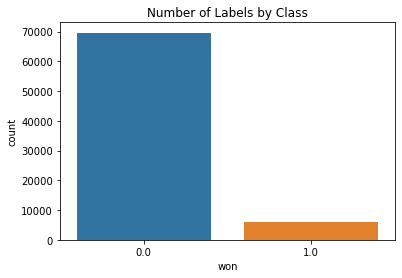

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(data=new_data, x='won')
plt.title('Number of Labels by Class')

In [49]:
X = new_data.drop(columns='won')
y = new_data['won']
# extermely skewed data
y.value_counts()

0.0    69638
1.0     6058
Name: won, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [51]:
X_test

,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,surface,distance,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
21660,3,60,0,1123.0,114,12,64.0,14.0,0,1200,...,1,1,0,0,0,0,0,0,0,0
71695,5,62,1,1029.0,117,6,8.0,2.5,0,1650,...,0,1,0,0,0,0,0,0,0,0
42215,3,60,0,1156.0,120,1,7.5,3.0,1,1200,...,0,1,0,0,0,0,0,0,0,0
19273,3,60,0,1114.0,117,7,98.0,20.0,0,1600,...,0,0,1,0,0,0,0,0,0,0
1724,3,60,0,1078.0,124,4,34.0,6.6,0,1200,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872,3,60,0,973.0,121,8,12.0,3.6,0,2000,...,0,1,0,0,0,0,0,0,0,0
10420,3,60,0,1183.0,131,1,20.0,6.0,0,1650,...,0,0,1,0,0,0,0,0,0,0
288,3,60,0,1116.0,126,1,30.0,9.4,0,1400,...,0,0,1,0,0,0,0,0,0,0
14767,3,60,0,1087.0,133,12,39.0,9.2,0,1200,...,0,1,0,0,0,0,0,0,0,0


# kNN Classifier (original data)

In [52]:
k_range = range(1,10) # X -- dataset that removes 'won' column; y -- 'won' column
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # precision ratio: tp / (tp + fp), aiming at minimize fp (predict: win, actual: lose)
    scores[k] = precision_score(y_test, y_pred)
    scores_list.append(precision_score(y_test, y_pred))

In [53]:
# find the highest precision score of the positive class (1)
import operator
max(scores.items(), key=operator.itemgetter(1))

(8, 0.3170731707317073)

Text(0.5, 1.0, 'Original Data')

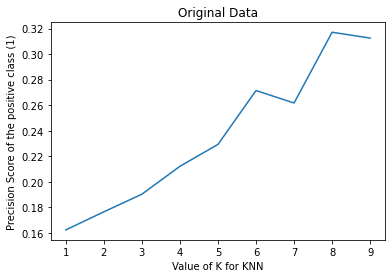

In [54]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision Score of the positive class (1)')
plt.title('Original Data')

In [55]:
start = time()

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 15.11794 sec


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     13918
         1.0       0.32      0.01      0.02      1222

    accuracy                           0.92     15140
   macro avg       0.62      0.50      0.49     15140
weighted avg       0.87      0.92      0.88     15140



[[13890    28]
 [ 1209    13]]


Text(0, 0.5, 'True')

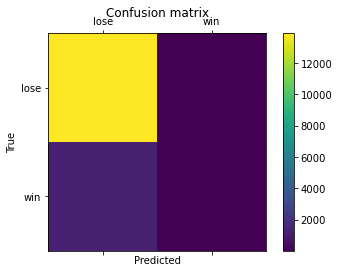

In [57]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

# KNN classifier (under-sampling)

In [58]:
rus = RandomUnderSampler(random_state = 0)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

k_range = range(1,10)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_rus, y_rus)
    y_pred = knn.predict(X_test)
    scores[k] = precision_score(y_test, y_pred)
    scores_list.append(precision_score(y_test, y_pred))

In [59]:
max(scores.items(), key=operator.itemgetter(1))

(8, 0.1512774089720378)

Text(0.5, 1.0, 'RUS Data')

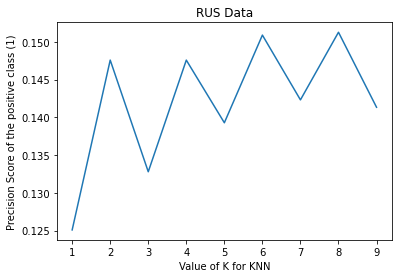

In [60]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision Score of the positive class (1)')
plt.title('RUS Data')

In [61]:
start = time()

knn_rus = KNeighborsClassifier(n_neighbors=8)
knn_rus.fit(X_rus, y_rus)
y_pred = knn_rus.predict(X_test)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 2.66305 sec


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81     13918
         1.0       0.15      0.62      0.24      1222

    accuracy                           0.69     15140
   macro avg       0.55      0.66      0.52     15140
weighted avg       0.89      0.69      0.76     15140



[[9699 4219]
 [ 470  752]]


Text(0, 0.5, 'True')

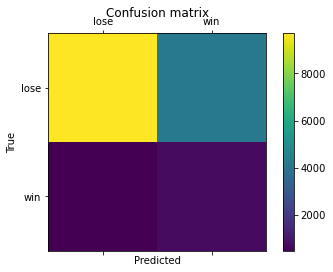

In [63]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

# KNN classifier (over-sampling)

In [64]:
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

k_range = range(1,10)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_sm, y_sm)
    y_pred = knn.predict(X_test)
    scores[k] = precision_score(y_test, y_pred)
    scores_list.append(precision_score(y_test, y_pred))

In [65]:
max(scores.items(), key=operator.itemgetter(1))

(2, 0.15530829856281872)

Text(0.5, 1.0, 'SMOTE Data')

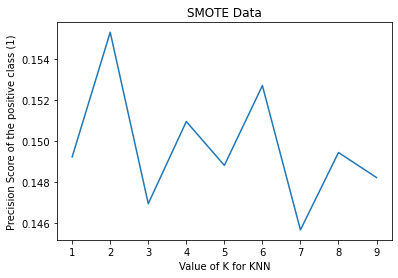

In [66]:
# SMOTE data
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision Score of the positive class (1)')
plt.title('SMOTE Data')

In [67]:
start = time()

knn_sm = KNeighborsClassifier(n_neighbors=2)
knn_sm.fit(X_sm, y_sm)
y_pred = knn_sm.predict(X_test)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 19.60046 sec


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     13918
         1.0       0.16      0.27      0.20      1222

    accuracy                           0.82     15140
   macro avg       0.54      0.57      0.55     15140
weighted avg       0.87      0.82      0.84     15140



[[12096  1822]
 [  887   335]]


Text(0, 0.5, 'True')

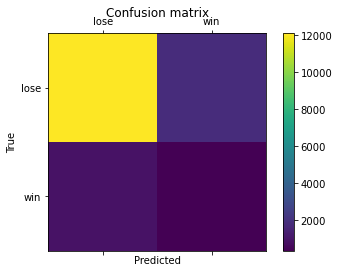

In [69]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

# LightGBM (original data)

In [70]:
start = time()

d_train = lgb.Dataset(X_train, label = y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 500
params['max_depth'] = 100
clf = lgb.train(params, d_train, 100)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4836, number of negative: 55720
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 60556, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.079860 -> initscore=-2.444251
[LightGBM] [Info] Start training from score -2.444251
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [71]:
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(15140):
    if y_pred[i] >= 0.0995:       # setting threshold 
        y_pred[i] = 1
    else:  
        y_pred[i] = 0

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92     13918
         1.0       0.27      0.42      0.33      1222

    accuracy                           0.86     15140
   macro avg       0.61      0.66      0.63     15140
weighted avg       0.89      0.86      0.88     15140



[[12567  1351]
 [  713   509]]


Text(0, 0.5, 'True')

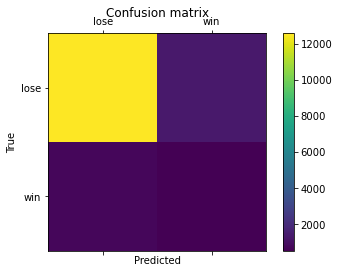

In [73]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

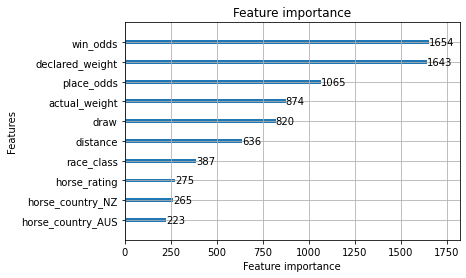

In [74]:
# plot model’s feature importances (original data)
lgb.plot_importance(clf, max_num_features=10)

# LightGBM (over-sampling)

In [75]:
# convert array data into dataframe with column names, and feed into lgb model
X_sm = pd.DataFrame(X_sm, columns=list(X_train))
X_sm.head()

,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,surface,distance,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,3,60,0,989.0,133,13,4.7,2.1,0,1600,...,0,1,0,0,0,0,0,0,0,0
1,4,39,1,1134.0,132,2,16.0,5.2,0,1200,...,0,1,0,0,0,0,0,0,0,0
2,3,60,0,1064.0,131,7,8.8,2.7,0,1400,...,0,1,0,0,0,0,0,0,0,0
3,3,60,0,1052.0,132,8,7.5,2.4,0,1800,...,0,0,1,0,0,0,0,0,0,0
4,3,51,0,1066.0,119,10,57.0,12.0,0,1400,...,0,0,1,0,0,0,0,0,0,0


In [76]:
start = time()

d_train = lgb.Dataset(X_sm, label = y_sm)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 500
params['max_depth'] = 100
clf_sm = lgb.train(params, d_train, 100)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55720, number of negative: 55720
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 111440, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
time cost: 0.67886 sec


In [77]:
#Prediction
y_pred = clf_sm.predict(X_test)
#convert into binary values
for i in range(15140):
    if y_pred[i] >= 0.5:       # setting threshold 
        y_pred[i] = 1
    else:  
        y_pred[i] = 0

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91     13918
         1.0       0.23      0.39      0.29      1222

    accuracy                           0.85     15140
   macro avg       0.59      0.64      0.60     15140
weighted avg       0.89      0.85      0.86     15140



[[12332  1586]
 [  742   480]]


Text(0, 0.5, 'True')

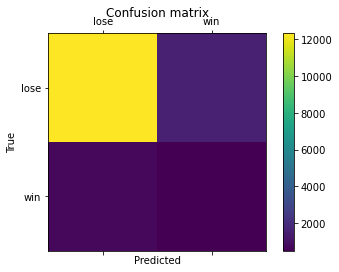

In [79]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

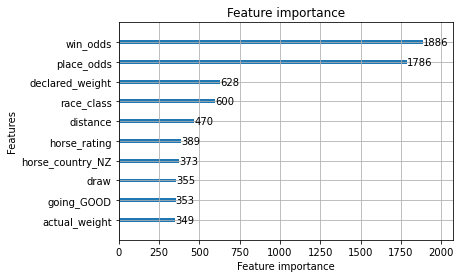

In [80]:
# plot model’s feature importances (SMOTE)
lgb.plot_importance(clf_sm, max_num_features=10)

# LightGBM (under-sampling)

In [81]:
# convert array data into dataframe with column names, and feed into lgb model
X_rus = pd.DataFrame(X_rus, columns=list(X_train))
X_rus.head()

,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,surface,distance,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,3,60,0,989.0,108,10,75.0,14.0,0,1200,...,0,0,1,0,0,0,0,0,0,0
1,5,36,1,1077.0,127,4,5.9,1.6,0,1200,...,1,1,0,0,0,0,0,0,0,0
2,5,64,1,1099.0,115,4,78.0,11.0,1,1200,...,0,1,0,0,0,0,0,0,0,0
3,3,60,0,1126.0,114,5,48.0,8.2,0,1650,...,0,1,0,0,0,0,0,0,0,0
4,3,60,0,1098.0,119,8,60.0,10.0,0,1400,...,0,1,0,0,0,0,0,0,0,0


In [82]:
start = time()

d_train = lgb.Dataset(X_rus, label = y_rus)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 500
params['max_depth'] = 100
clf_rus = lgb.train(params, d_train, 100)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4836, number of negative: 4836
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 9672, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [83]:
#Prediction
y_pred = clf_rus.predict(X_test)
#convert into binary values
for i in range(15140):
    if y_pred[i] >= 0.55:       # setting threshold 
        y_pred[i] = 1
    else:  
        y_pred[i] = 0

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     13918
         1.0       0.30      0.35      0.32      1222

    accuracy                           0.88     15140
   macro avg       0.62      0.64      0.63     15140
weighted avg       0.89      0.88      0.88     15140



[[12899  1019]
 [  793   429]]


Text(0, 0.5, 'True')

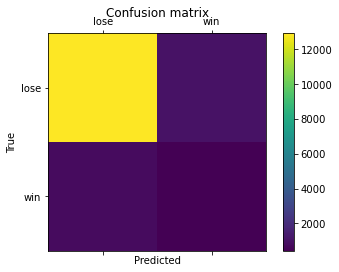

In [85]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

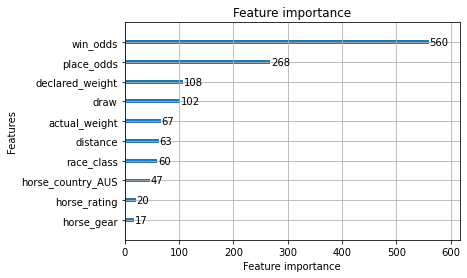

In [86]:
# plot model’s feature importances (Random Under-sampling)
lgb.plot_importance(clf_rus, max_num_features=10)

# Deploy models

In [87]:
# data that never been seen by the models
last_race

,race_id,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
76697,6128,0.0,6,80,1,1078.0,133,11,99.0,19.0,...,1,0,1,0,0,0,0,0,0,0
76698,6128,0.0,4,77,1,1110.0,130,8,13.0,2.9,...,1,0,1,0,0,0,0,0,0,0
76699,6128,0.0,4,74,0,980.0,127,5,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
76700,6128,1.0,3,73,1,1153.0,126,3,1.7,1.2,...,1,0,1,0,0,0,0,0,0,0
76701,6128,0.0,4,73,1,1117.0,124,2,71.0,11.0,...,1,0,1,0,0,0,0,0,0,0
76702,6128,0.0,3,70,1,1166.0,123,13,99.0,23.0,...,1,0,1,0,0,0,0,0,0,0
76703,6128,0.0,4,70,1,1116.0,123,12,17.0,3.0,...,1,0,1,0,0,0,0,0,0,0
76704,6128,0.0,4,68,1,1068.0,121,10,55.0,9.0,...,1,0,1,0,0,0,0,0,0,0
76705,6128,0.0,4,67,1,1091.0,118,1,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
76706,6128,0.0,4,65,0,1141.0,116,4,33.0,5.7,...,1,0,1,0,0,0,0,0,0,0


In [88]:
# drop unnecessary columns & define data and labels
X_deploy = last_race.drop(columns=['race_id', 'won'])
y_deploy = last_race.won

# Load KNN model trained with original data

In [89]:
predictions = knn.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.77      0.83        13
         1.0       0.00      0.00      0.00         1

    accuracy                           0.71        14
   macro avg       0.45      0.38      0.42        14
weighted avg       0.84      0.71      0.77        14



# Load KNN model trained with under-sampling data

In [90]:
predictions = knn_rus.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       0.50      1.00      0.67         1

    accuracy                           0.93        14
   macro avg       0.75      0.96      0.81        14
weighted avg       0.96      0.93      0.94        14



# Load KNN model trained with over-sampling data

In [91]:
predictions = knn_sm.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        13
         1.0       0.00      0.00      0.00         1

    accuracy                           0.86        14
   macro avg       0.46      0.46      0.46        14
weighted avg       0.86      0.86      0.86        14



# Load LightGBM models & Set threshold values same as the training models

In [92]:
predictions = clf.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions[i] >= 0.0995:       # setting threshold 
        predictions[i] = 1
    else:  
        predictions[i] = 0

In [93]:
predictions_rus = clf_rus.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions_rus[i] >= 0.55:       # setting threshold 
        predictions_rus[i] = 1
    else:  
        predictions_rus[i] = 0

In [94]:
predictions_sm = clf_sm.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions_sm[i] >= 0.5:       # setting threshold 
        predictions_sm[i] = 1
    else:  
        predictions_sm[i] = 0

# Predictions of the LightGBM models

In [95]:
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [96]:
print(classification_report(y_deploy, predictions_rus))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [97]:
print(classification_report(y_deploy, predictions_sm))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



Text(0, 0.5, 'Actual')

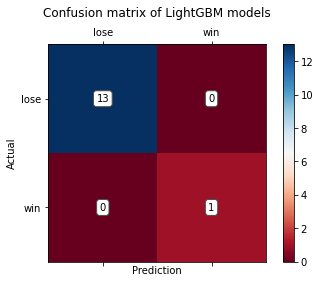

In [98]:
data = confusion_matrix(y_deploy, predictions)

fig, ax = plt.subplots()
cax = ax.matshow(data, cmap='RdBu')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.title('Confusion matrix of LightGBM models', y=1.1)
fig.colorbar(cax)
labels = ['lose', 'win']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Prediction')
plt.ylabel('Actual')